## a. Which universities are ranked in the top 10 globally?
## b. Which universities are ranked in the top 10 for employment outcomes?
## c. What positions do universities in Saudi Arabia hold within the global rankings?
## d. Considering various factors such as employment rankings, research rankings, and others, which has the most significant impact on a university's overall ranking?
## e. Is there a correlation between national and global university rankings, and based on this information, can you recommend a country that appears to have a high concentration of top-ranked universities?
## f. Bonus: Develop two additional questions that could be explored using the data set at your disposal.


In [ ]:
!pip install openpyxl
!pip install plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore , pearsonr
import plotly.graph_objects as go

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 26.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [ ]:
df = pd.read_excel("Word Rank University.xlsx")

In [ ]:
df2 = pd.read_excel("shanghai Ranking.xlsx")

In [ ]:
df3 = pd.read_excel("Times Higher Education.xlsx")


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [ ]:
df.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [ ]:
df2.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


In [ ]:
df3.head()

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [ ]:
df.shape

(2000, 9)

In [ ]:
df2.shape

(1000, 6)

In [ ]:
df3.shape

(1591, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   object 
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
 4   LOGO                    1000 non-null   object 
 5   University Detail       1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1591 non-null   object 
 1   University Name                 1591 non-null   object 
 2   ranking-institution-title href  1500 non-null   object 
 3   Location                        1500 non-null   object 
 4   sdg-score-multi__number         867 non-null    float64
 5   sdg-score-multi__value          867 non-null    object 
 6   sdg-score-multi__number 2       826 non-null    float64
 7   sdg-score-multi__value 2        825 non-null    object 
 8   sdg-score-multi__number 3       812 non-null    float64
 9   sdg-score-multi__value 3        805 non-null    object 
 10  sdg-score-multi__value 4        1583 non-null   object 
 11  scores                          1591 non-null   object 
 12  sdg-score-multi__number 5       56

In [ ]:
df.describe()

,National Rank,Score
count,2000.000000,2000.00000
mean,69.245000,71.75555
std,85.538608,5.03880
min,1.000000,66.00000
25%,9.750000,67.90000
50%,33.000000,70.40000
75%,89.000000,74.30000
max,332.000000,100.00000


In [ ]:
df2.describe()

,Total Score
count,1000.000000
mean,5.943500
std,12.379624
min,0.000000
25%,0.000000
50%,0.000000
75%,7.500000
max,100.000000


In [ ]:
df3.describe()

,sdg-score-multi__number,sdg-score-multi__number 2,sdg-score-multi__number 3,sdg-score-multi__number 5,sdg-score-multi__number 6,sdg-score-multi__number 7,sdg-score-multi__number 8
count,867.000000,826.000000,812.000000,565.000000,498.000000,439.000000,483.000000
mean,8.193772,8.446731,7.902709,5.488496,6.777108,7.596811,5.962733
std,4.240660,4.786111,4.403411,3.151375,3.230968,4.278980,3.346928
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000
50%,9.000000,8.000000,8.000000,5.000000,6.000000,7.000000,4.000000
75%,11.000000,12.000000,11.000000,8.000000,8.000000,10.000000,7.000000
max,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
df.columns

Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

In [ ]:
df2.columns

Index(['Ranking', 'University Name', 'National/Regional Rank', 'Total Score',
       'LOGO', 'University Detail '],
      dtype='object')

In [ ]:
df3.columns

Index(['Rank', 'University Name ', 'ranking-institution-title href',
       'Location', 'sdg-score-multi__number', 'sdg-score-multi__value',
       'sdg-score-multi__number 2', 'sdg-score-multi__value 2',
       'sdg-score-multi__number 3', 'sdg-score-multi__value 3',
       'sdg-score-multi__value 4', 'scores', 'sdg-score-multi__number 5',
       'sdg-score-multi__value 5', 'sdg-score-multi__number 6',
       'sdg-score-multi__value 6', 'sdg-score-multi__number 7',
       'sdg-score-multi__value 7', 'sdg-score-multi__number 8',
       'sdg-score-multi__value 8'],
      dtype='object')

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

This analysis is based on three datasets, all of which were downloaded from Kaggle and extracted from their respective sources. 
1- Center for World University Rankings (CWUR): https://www.cwur.org/2023.php
2- Academic Ranking of World Universities (ARWU): https://www.shanghairanking.com/rankings/arwu/2022
3 - Times Higher Education World University Ranking (THE) : https://www.timeshighereducation.com/rankings/impact/overall/2023#!/length/100/sort_by/scores_overall/sort_order/desc


#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# (CWUR) and (THE) data were collected in 2023, whereas (ARWU) data were collected in 2022.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


After reviewing each data source, we found that all the data were consistent with those in the Kaggle repository.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


For Sample Appropriateness: all the datasets collect data from various universities located in different regions, ensuring a diverse and comprehensive representation.

In [ ]:
df2.drop(['LOGO','University Detail '], axis=1 , inplace=True)
df2

,Ranking,University Name,National/Regional Rank,Total Score
0,1,Harvard University,1,100.0
1,2,Stanford University,2,76.8
2,3,Massachusetts Institute of Technology (MIT),3,70.1
3,4,University of Cambridge,1,69.6
4,5,"University of California, Berkeley",4,65.3
...,...,...,...,...
995,901-1000,University of Wuppertal,46-47,0.0
996,901-1000,Warsaw University of Technology,7-11,0.0
997,901-1000,Western Norway University of Applied Sciences,6-7,0.0
998,901-1000,Wroclaw University of Science and Technology,7-11,0.0


In [ ]:
df3.drop('ranking-institution-title href' , axis=1 , inplace=True)
df3

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1001+,Zarqa University,Jordan,NaN,NaN,NaN,NaN,1.0,23.3–38.1,1.5–45.2,7.9–53.8,NaN,NaN,4.0,43.6–50.9,3.0,32.1–44.6,NaN,NaN
1587,1001+,Zewail City of Science and Technology,Egypt,3.0,44.7–54.5,7.0,11.1–38.6,NaN,NaN,45.3–53.3,7.9–53.8,1.0,54.5–60.1,NaN,NaN,NaN,NaN,NaN,NaN
1588,1001+,Zhytomyr Ivan Franko State University,Ukraine,NaN,NaN,10.0,3.9–25.5,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,8.0,35.7–48.3,5.0,43.7–51.5,NaN,NaN
1589,1001+,University of Žilina,Slovakia,11.0,20.9–38.4,NaN,NaN,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,9.0,17.2–33.8,NaN,NaN,4.0,2.8–35.7


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


Uniqueness in first dataframe

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['University Names'].duplicated().sum()

0

In [ ]:
df['World Rank'].duplicated().sum()

0

Uniqueness in second datafram

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2['University Name'].duplicated().sum()

0

In [ ]:
df2['Ranking'].duplicated().sum()

907

In [ ]:
df2['Total Score'].duplicated().sum()

894

Uniqueness in third datafram

In [ ]:
df3.duplicated().sum()

0

In [ ]:
df3['University Name '].duplicated().sum()

0

In [ ]:
df3['Rank'].duplicated().sum()

1527

In [ ]:
df3['scores'].duplicated().sum()

1527

In [ ]:
df3[df3['Rank'].duplicated(keep=False)]

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
6,=7,University of Alberta,Canada,9.0,99.4,2.0,89.2,15.0,91.0,94.4,96.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,=7,RMIT University,Australia,10.0,92.1,8.0,83.7,11.0,87.4,98.5,96.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,=9,Aalborg University,Denmark,4.0,90.6,10.0,90.2,14.0,93.4,98.5,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,=9,University of Victoria,Canada,11.0,91.8,13.0,89.4,12.0,88.4,91.9,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,=9,Western University,Canada,9.0,97.7,1.0,88.0,8.0,78.6,81.9–86.9,95.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1001+,Zarqa University,Jordan,NaN,NaN,NaN,NaN,1.0,23.3–38.1,1.5–45.2,7.9–53.8,NaN,NaN,4.0,43.6–50.9,3.0,32.1–44.6,NaN,NaN
1587,1001+,Zewail City of Science and Technology,Egypt,3.0,44.7–54.5,7.0,11.1–38.6,NaN,NaN,45.3–53.3,7.9–53.8,1.0,54.5–60.1,NaN,NaN,NaN,NaN,NaN,NaN
1588,1001+,Zhytomyr Ivan Franko State University,Ukraine,NaN,NaN,10.0,3.9–25.5,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,8.0,35.7–48.3,5.0,43.7–51.5,NaN,NaN
1589,1001+,University of Žilina,Slovakia,11.0,20.9–38.4,NaN,NaN,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,9.0,17.2–33.8,NaN,NaN,4.0,2.8–35.7


There are no duplicate rows or values that might affect the results.

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [ ]:
df.isnull().sum()

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [ ]:
df2.isnull().sum()

Ranking                   0
University Name           0
National/Regional Rank    0
Total Score               0
dtype: int64

There are no null values in either dataset one or dataset two.

In [ ]:
df3.isnull().sum()

Rank                            0
University Name                 0
Location                       91
sdg-score-multi__number       724
sdg-score-multi__value        724
sdg-score-multi__number 2     765
sdg-score-multi__value 2      766
sdg-score-multi__number 3     779
sdg-score-multi__value 3      786
sdg-score-multi__value 4        8
scores                          0
sdg-score-multi__number 5    1026
sdg-score-multi__value 5     1034
sdg-score-multi__number 6    1093
sdg-score-multi__value 6     1095
sdg-score-multi__number 7    1152
sdg-score-multi__value 7     1152
sdg-score-multi__number 8    1108
sdg-score-multi__value 8     1108
dtype: int64

In [ ]:
df3['Location'] = df3['Location'].fillna('Unknown!')

In [ ]:
df3[['sdg-score-multi__number' , 'sdg-score-multi__value']] = df3[['sdg-score-multi__number' , 'sdg-score-multi__value']].fillna(0)
df3[['sdg-score-multi__number 2' , 'sdg-score-multi__value 2']] = df3[['sdg-score-multi__number 2' , 'sdg-score-multi__value 2']].fillna(0)
df3[['sdg-score-multi__number 3' , 'sdg-score-multi__value 3']] = df3[['sdg-score-multi__number 3' , 'sdg-score-multi__value 3']].fillna(0)
df3['sdg-score-multi__value 4'] = df3['sdg-score-multi__value 4'].fillna(0)
df3[['sdg-score-multi__number 5' , 'sdg-score-multi__value 5']] = df3[['sdg-score-multi__number 5' , 'sdg-score-multi__value 5']].fillna(0)
df3[['sdg-score-multi__number 6' , 'sdg-score-multi__value 6']] = df3[['sdg-score-multi__number 6' , 'sdg-score-multi__value 6']].fillna(0)
df3[['sdg-score-multi__number 7' , 'sdg-score-multi__value 7']] = df3[['sdg-score-multi__number 7' , 'sdg-score-multi__value 7']].fillna(0)
df3[['sdg-score-multi__number 8' , 'sdg-score-multi__value 8']] = df3[['sdg-score-multi__number 8' , 'sdg-score-multi__value 8']].fillna(0)

In [ ]:
df3.isnull().sum()

Rank                         0
University Name              0
Location                     0
sdg-score-multi__number      0
sdg-score-multi__value       0
sdg-score-multi__number 2    0
sdg-score-multi__value 2     0
sdg-score-multi__number 3    0
sdg-score-multi__value 3     0
sdg-score-multi__value 4     0
scores                       0
sdg-score-multi__number 5    0
sdg-score-multi__value 5     0
sdg-score-multi__number 6    0
sdg-score-multi__value 6     0
sdg-score-multi__number 7    0
sdg-score-multi__value 7     0
sdg-score-multi__number 8    0
sdg-score-multi__value 8     0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [ ]:
df.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

In [ ]:
df['World Rank'] = df['World Rank'].map(lambda x : int(x.split('Top')[0]))

In [ ]:
df['Employability Rank'] = df['Employability Rank'].map(lambda x : 0 if x == '-' else x)

In [ ]:
df['Employability Rank'] = df['Employability Rank'].astype(int)

In [ ]:
df['Faculty Rank'] = df['Faculty Rank'].map(lambda x : 0 if x == '-' else x)

In [ ]:
df['Faculty Rank'] = df['Faculty Rank'].astype(int)

In [ ]:
df['Research Rank'] = df['Research Rank'].map(lambda x : 0 if x == '-' else x)

In [ ]:
df['Research Rank'] = df['Research Rank'].astype(int)

In [ ]:
df['Educational Rank'] = df['Educational Rank'].map(lambda x : 0 if x == '-' else x)

In [ ]:
df['Educational Rank'] = df['Educational Rank'].astype(int)

In [ ]:
df['University Names'] = df['University Names'].map(lambda x : x.split('\n')[0])

In [ ]:
df

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999,Bharathidasan University,India,64,0,0,0,1922,66.0


In [ ]:
df.dtypes

World Rank              int64
University Names       object
Location               object
National Rank           int64
Educational Rank        int64
Employability Rank      int64
Faculty Rank            int64
Research Rank           int64
Score                 float64
dtype: object

In [ ]:
df2.dtypes

World Rank          object
University Name     object
National Rank       object
Total Score        float64
dtype: object

In [ ]:
df2.rename(columns={'Ranking' : 'World Rank','National/Regional Rank' :'National Rank'}, inplace=True)

In [ ]:
df2['World Rank'] = df2['World Rank'].map(lambda x : int(x.split('-')[0]))

In [ ]:
df2['National Rank'] = df2['National Rank'].map(lambda x : int(x.split('-')[0]))

In [ ]:
df2.dtypes

World Rank           int64
University Name     object
National Rank        int64
Total Score        float64
dtype: object

In [ ]:
df3.dtypes

Rank                          object
University Name               object
Location                      object
sdg-score-multi__number      float64
sdg-score-multi__value        object
sdg-score-multi__number 2    float64
sdg-score-multi__value 2      object
sdg-score-multi__number 3    float64
sdg-score-multi__value 3      object
sdg-score-multi__value 4      object
scores                        object
sdg-score-multi__number 5    float64
sdg-score-multi__value 5      object
sdg-score-multi__number 6    float64
sdg-score-multi__value 6      object
sdg-score-multi__number 7    float64
sdg-score-multi__value 7      object
sdg-score-multi__number 8    float64
sdg-score-multi__value 8      object
dtype: object

In [ ]:
df3.rename(columns={'University Name ' : 'University Name'}, inplace=True)
df3['Rank'] = df3['Rank'].map(lambda x : x.split('–')[0])
df3['Rank'] = df3['Rank'].map(lambda x : x.split('.')[0])
df3['Rank'] = df3['Rank'].map(lambda x : x.split('+')[0])
df3['Rank'] = df3['Rank'].map(lambda x: int(x.split('=')[1]) if '=' in x else int(x))

In [ ]:
df3['scores'] = df3['scores'].astype(str)
df3['scores'] = df3['scores'].map(lambda x: x.split('–')[1] if '–' in x else float(x))
df3['sdg-score-multi__value'] = df3['sdg-score-multi__value'].astype(str)
df3['sdg-score-multi__value'] = df3['sdg-score-multi__value'].map(lambda x: x.split('–')[1] if '–' in x else float(x))
df3['sdg-score-multi__value'] = df3['sdg-score-multi__value'].astype(float)
df3['sdg-score-multi__value 2'] = df3['sdg-score-multi__value 2'].astype(str)
df3['sdg-score-multi__value 2'] = df3['sdg-score-multi__value 2'].map(lambda x: x.split('–')[1] if '–' in x else float(x))
df3['sdg-score-multi__value 3'] = df3['sdg-score-multi__value 3'].astype(str)
df3['sdg-score-multi__value 3'] = df3['sdg-score-multi__value 3'].map(lambda x: x.split('–')[1] if '–' in x else float(x))
df3['sdg-score-multi__value 4'] = df3['sdg-score-multi__value 4'].astype(str)
df3['sdg-score-multi__value 4'] = df3['sdg-score-multi__value 4'].map(lambda x: x.split('–')[1] if '–' in x else float(x))
df3['sdg-score-multi__value 4'] = df3['sdg-score-multi__value 4'].astype(float)
df3['sdg-score-multi__value 5'] = df3['sdg-score-multi__value 5'].astype(str)
df3['sdg-score-multi__value 5'] = df3['sdg-score-multi__value 5'].map(lambda x: x.split('–')[1] if '–' in x else float(x))
df3['sdg-score-multi__value 6'] = df3['sdg-score-multi__value 6'].astype(str)
df3['sdg-score-multi__value 6'] = df3['sdg-score-multi__value 6'].map(lambda x: x.split('–')[1] if '–' in x else float(x))
df3['sdg-score-multi__value 7'] = df3['sdg-score-multi__value 7'].astype(str)
df3['sdg-score-multi__value 7'] = df3['sdg-score-multi__value 7'].map(lambda x: x.split('–')[1] if '–' in x else float(x))
df3['sdg-score-multi__value 8'] = df3['sdg-score-multi__value 8'].astype(str)
df3['sdg-score-multi__value 8'] = df3['sdg-score-multi__value 8'].map(lambda x: x.split('–')[1] if '–' in x else float(x))

KeyError: 'sdg-score-multi__value'

In [ ]:
df3.dtypes

Rank                                              int64
University Name                                  object
Location                                         object
Gender equality rank                            float64
Gender equality value                           float64
Responsible consumption and production rank     float64
Responsible consumption and production value     object
Life on land rank                               float64
Life on land value                               object
Partnerships for the goals                      float64
scores                                           object
No poverty rank                                 float64
No poverty value                                 object
Affordable and clean energy rank                float64
Affordable and clean energy value                object
Good health and well being rank                 float64
Good health and well being value                 object
Quality education rank                          

In [ ]:
df3.rename(columns={'University Name ' : 'University Name'}, inplace=True)

In [ ]:
df3.head(2)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df3 = df3.rename(columns={'sdg-score-multi__number':'Gender equality rank' , 'sdg-score-multi__value':'Gender equality value'})
df3 = df3.rename(columns={'sdg-score-multi__number 2':'Responsible consumption and production rank' , 'sdg-score-multi__value 2':'Responsible consumption and production value'})
df3 = df3.rename(columns={'sdg-score-multi__number 3':'Life on land rank' , 'sdg-score-multi__value 3':'Life on land value'})
df3 = df3.rename(columns={'sdg-score-multi__value 4':'Partnerships for the goals'})
df3 = df3.rename(columns={'sdg-score-multi__number 5':'No poverty rank' , 'sdg-score-multi__value 5':'No poverty value'})
df3 = df3.rename(columns={'sdg-score-multi__number 6':'Affordable and clean energy rank' ,'sdg-score-multi__value 6' : 'Affordable and clean energy value'})
df3 = df3.rename(columns={'sdg-score-multi__number 7':'Good health and well being rank' , 'sdg-score-multi__value 7':'Good health and well being value'})
df3 = df3.rename(columns={'sdg-score-multi__number 8':'Quality education rank' , 'sdg-score-multi__value 8':'Quality education value'})


In [ ]:
df3.head(2)

,Rank,University Name,Location,Gender equality rank,Gender equality value,Responsible consumption and production rank,Responsible consumption and production value,Life on land rank,Life on land value,Partnerships for the goals,scores,No poverty rank,No poverty value,Affordable and clean energy rank,Affordable and clean energy value,Good health and well being rank,Good health and well being value,Quality education rank,Quality education value
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Univariate Analysis:

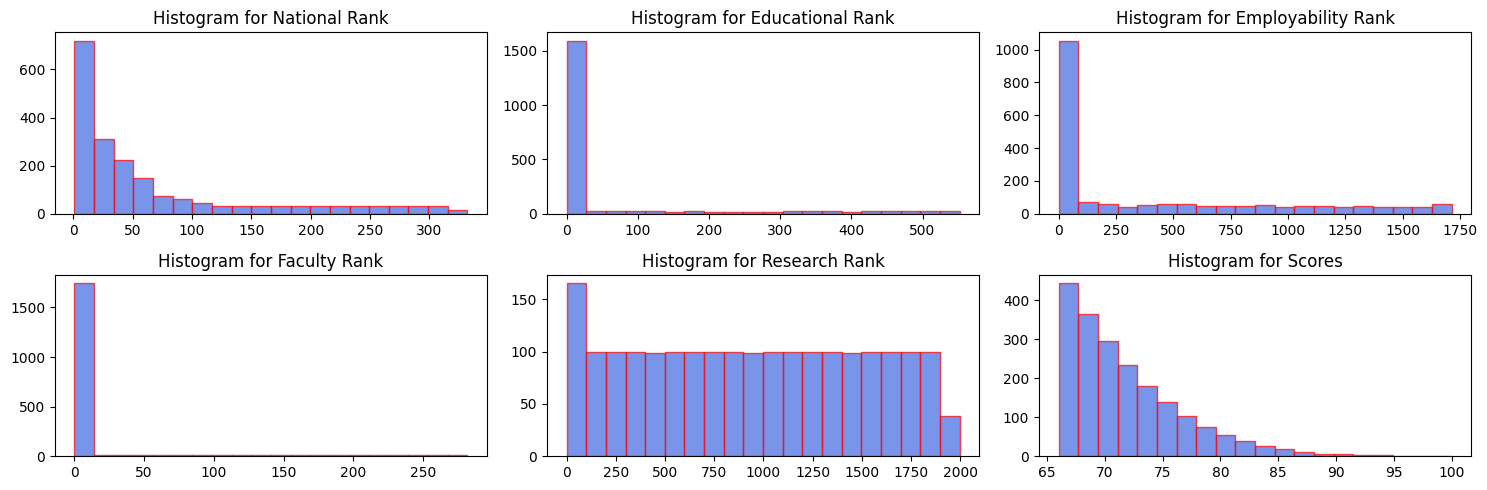

In [ ]:
# Before

fig, axes = plt.subplots(2, 3, figsize=(15, 5))
axes[0][0].hist(df['National Rank'],edgecolor = 'red', bins=20, alpha=0.7, color='royalblue')
axes[0][0].set_title('Histogram for National Rank')

axes[0][1].hist(df['Educational Rank'], edgecolor = 'red', bins=20, alpha=0.7, color='royalblue')
axes[0][1].set_title('Histogram for Educational Rank')

axes[0][2].hist(df['Employability Rank'], edgecolor = 'red', bins=20, alpha=0.7, color='royalblue')
axes[0][2].set_title('Histogram for Employability Rank')

axes[1][0].hist(df['Faculty Rank'], edgecolor = 'red', bins=20, alpha=0.7, color='royalblue')
axes[1][0].set_title('Histogram for Faculty Rank')

axes[1][1].hist(df['Research Rank'],edgecolor = 'red', bins=20, alpha=0.7, color='royalblue')
axes[1][1].set_title('Histogram for Research Rank')

axes[1][2].hist(df['Score'],edgecolor = 'red', bins=20, alpha=0.7, color='royalblue')
axes[1][2].set_title('Histogram for Scores')

plt.tight_layout()
plt.show()

In [ ]:
filter1 = df[df['National Rank'] == 1]
filter1

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
12,13,University of Tokyo,Japan,1,37,6,113,30,89.8
20,21,PSL University,France,1,17,31,111,91,88.0
22,23,University of Toronto,Canada,1,233,163,23,3,87.7
...,...,...,...,...,...,...,...,...,...
1823,1824,Tribhuvan University,Nepal,1,0,0,0,1751,66.6
1919,1920,Muhimbili University of Health and Allied Scie...,Tanzania,1,0,0,0,1843,66.2
1929,1930,University of Science and Technology Houari Bo...,Algeria,1,0,0,0,1853,66.2
1945,1946,An-Najah National University,Palestine,1,0,0,0,1866,66.2


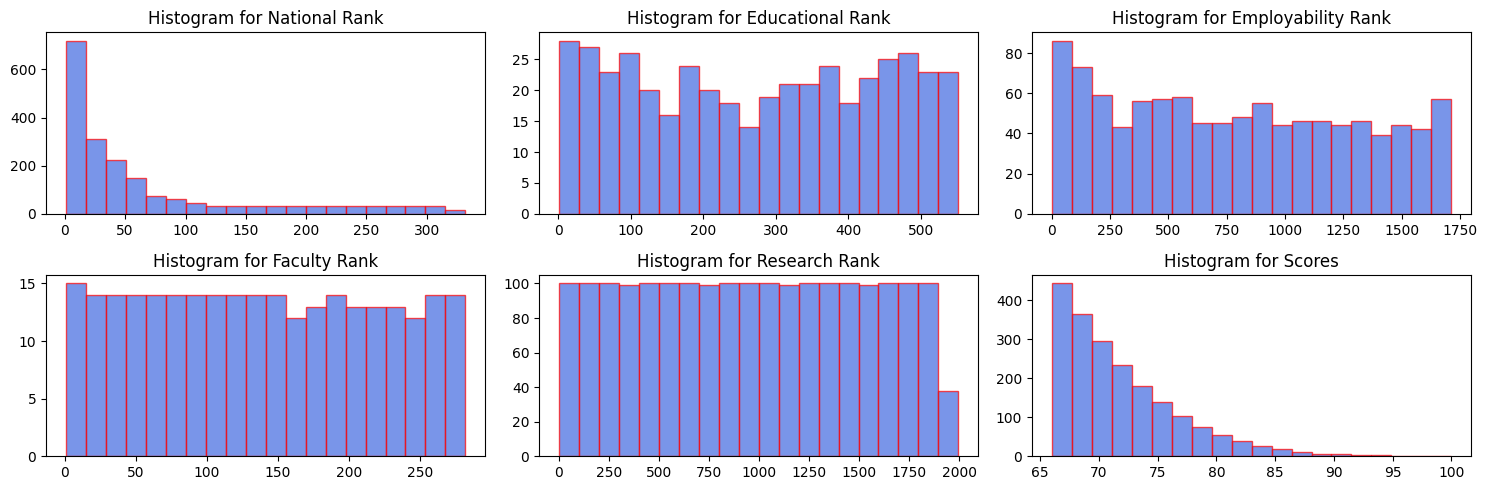

In [ ]:
# After

fig, axes = plt.subplots(2, 3, figsize=(15, 5))

axes[0][0].hist(df['National Rank'],edgecolor = 'red', bins=20, alpha=0.7, color='royalblue')
axes[0][0].set_title('Histogram for National Rank')

filter2 = df[df['Educational Rank'] != 0]
axes[0][1].hist(filter2['Educational Rank'], edgecolor = 'red', bins=20, alpha=0.7, color='royalblue')
axes[0][1].set_title('Histogram for Educational Rank')

filter3 = df[df['Employability Rank'] != 0]
axes[0][2].hist(filter3['Employability Rank'], edgecolor = 'red', bins=20, alpha=0.7, color='royalblue')
axes[0][2].set_title('Histogram for Employability Rank')

filter4 = df[df['Faculty Rank'] != 0]
axes[1][0].hist(filter4['Faculty Rank'], edgecolor = 'red', bins=20, alpha=0.7, color='royalblue')
axes[1][0].set_title('Histogram for Faculty Rank')

filter5 = df[df['Research Rank'] != 0]
axes[1][1].hist(filter5['Research Rank'],edgecolor = 'red', bins=20, alpha=0.7, color='royalblue')
axes[1][1].set_title('Histogram for Research Rank')

filter6 = df[df['Score'] != 0]
axes[1][2].hist(filter6['Score'],edgecolor = 'red', bins=20, alpha=0.7, color='royalblue')
axes[1][2].set_title('Histogram for Scores')

plt.tight_layout()
plt.show()

In [ ]:
top_5_df = df.head(5)
top_5_df

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3


### a. Which universities are ranked in the top 10 globally?

In [ ]:
top = df[df['World Rank'] <= 10]
top

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6,Princeton University,USA,4,5,16,6,82,92.6
6,7,University of Chicago,USA,5,8,15,22,28,92.1
7,8,Columbia University,USA,6,12,14,10,13,91.6
8,9,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10,Yale University,USA,8,6,35,13,21,90.8


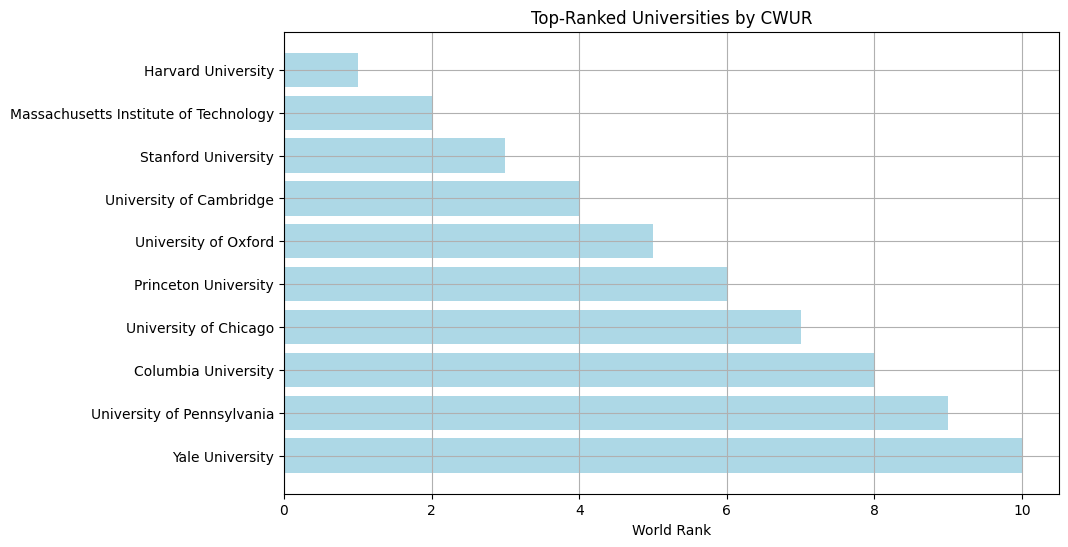

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top['University Names'], top['World Rank'], color='lightblue')
plt.xlabel('World Rank')
plt.title('Top-Ranked Universities by CWUR')
plt.gca().invert_yaxis() 
plt.grid(True)
plt.show()

In [ ]:
Top_ch = df2[df2['World Rank'] <= 10]
Top_ch

,World Rank,University Name,National Rank,Total Score
0,1,Harvard University,1,100.0
1,2,Stanford University,2,76.8
2,3,Massachusetts Institute of Technology (MIT),3,70.1
3,4,University of Cambridge,1,69.6
4,5,"University of California, Berkeley",4,65.3
5,6,Princeton University,5,60.0
6,7,University of Oxford,2,58.7
7,8,Columbia University,6,57.2
8,9,California Institute of Technology,7,56.1
9,10,University of Chicago,8,55.1


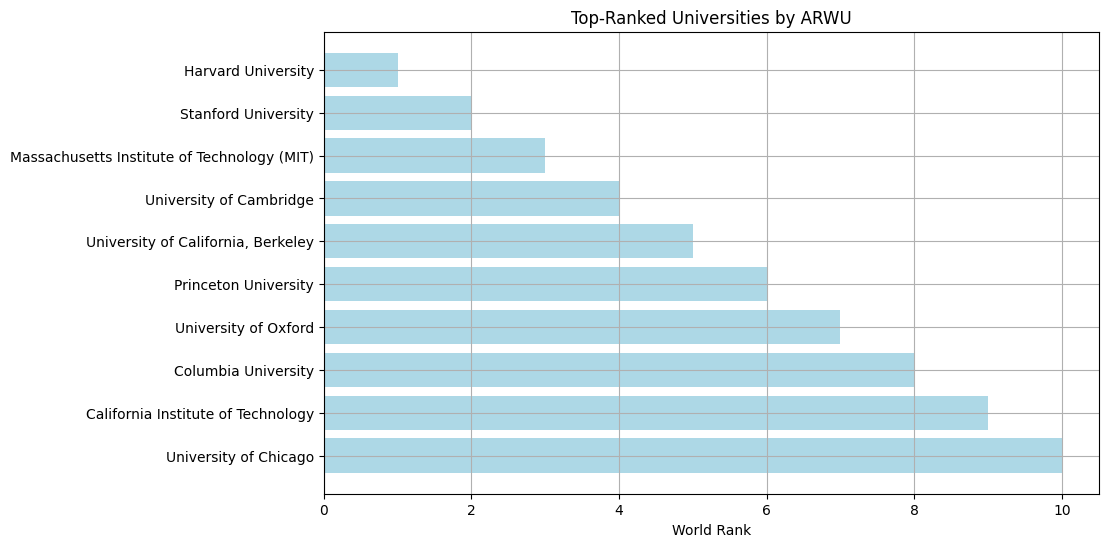

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(Top_ch['University Name'], Top_ch['World Rank'], color='lightblue')
plt.xlabel('World Rank')
plt.title('Top-Ranked Universities by ARWU')
plt.gca().invert_yaxis() 
plt.grid(True)
plt.show()

In [ ]:
Top_ti = df3[df3['Rank'] <= 10]
Top_ti

,Rank,University Name,Location,Gender equality rank,Gender equality value,Responsible consumption and production rank,Responsible consumption and production value,Life on land rank,Life on land value,Partnerships for the goals,scores,No poverty rank,No poverty value,Affordable and clean energy rank,Affordable and clean energy value,Good health and well being rank,Good health and well being value,Quality education rank,Quality education value
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Queen’s University,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Universiti Sains Malaysia,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,University of Tasmania,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,Arizona State University (Tempe),United States,15.0,95.4,14.0,93.9,6.0,87.6,86.9,96.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,University of Alberta,Canada,9.0,99.4,2.0,89.2,15.0,91.0,94.4,96.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,RMIT University,Australia,10.0,92.1,8.0,83.7,11.0,87.4,98.5,96.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,Aalborg University,Denmark,4.0,90.6,10.0,90.2,14.0,93.4,98.5,95.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,University of Victoria,Canada,11.0,91.8,13.0,89.4,12.0,88.4,91.9,95.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


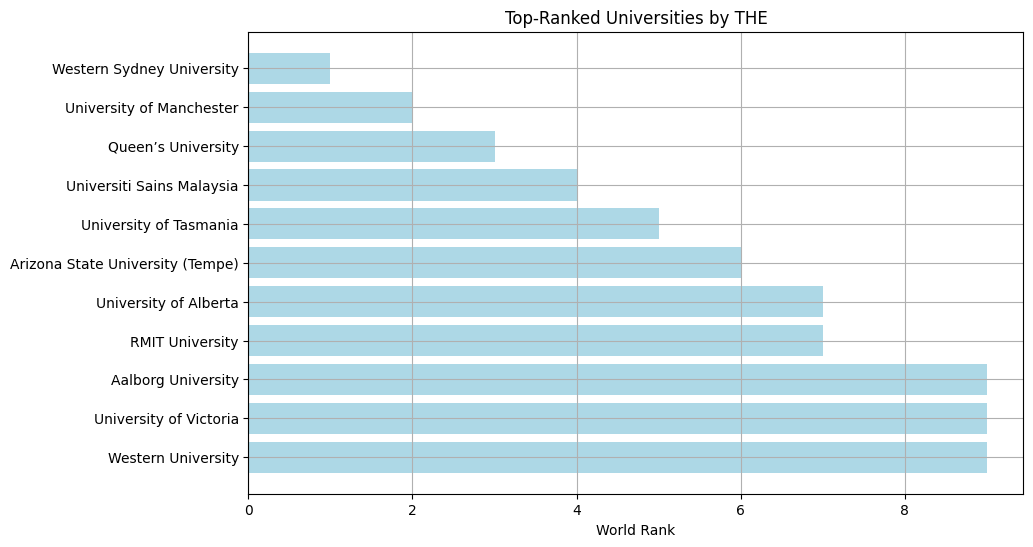

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(Top_ti['University Name'], Top_ti['Rank'], color='lightblue')
plt.xlabel('World Rank')
plt.title('Top-Ranked Universities by THE')
plt.gca().invert_yaxis() 
plt.grid(True)
plt.show()

### b. Which universities are ranked in the top 10 for employment outcomes?

In [ ]:
dff = df[(df['Employability Rank'] >= 1) & (df['Employability Rank'] <= 10)]
dff_sorted = dff.sort_values(by='Employability Rank')
dff_sorted

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
119,120,INSEAD,France,6,0,2,0,1710,81.1
210,211,Institut national du service public,France,11,0,3,0,0,78.5
2,3,Stanford University,USA,3,11,4,2,2,95.2
273,274,China Europe International Business School,China,32,0,5,0,0,77.3
12,13,University of Tokyo,Japan,1,37,6,113,30,89.8
279,280,HEC Paris,France,15,0,7,0,0,77.2
8,9,University of Pennsylvania,USA,7,14,8,45,12,91.2
44,45,Institut Polytechnique de Paris,France,5,102,9,188,370,85.1
405,406,International Institute for Management Develop...,Switzerland,8,0,10,0,0,75.3


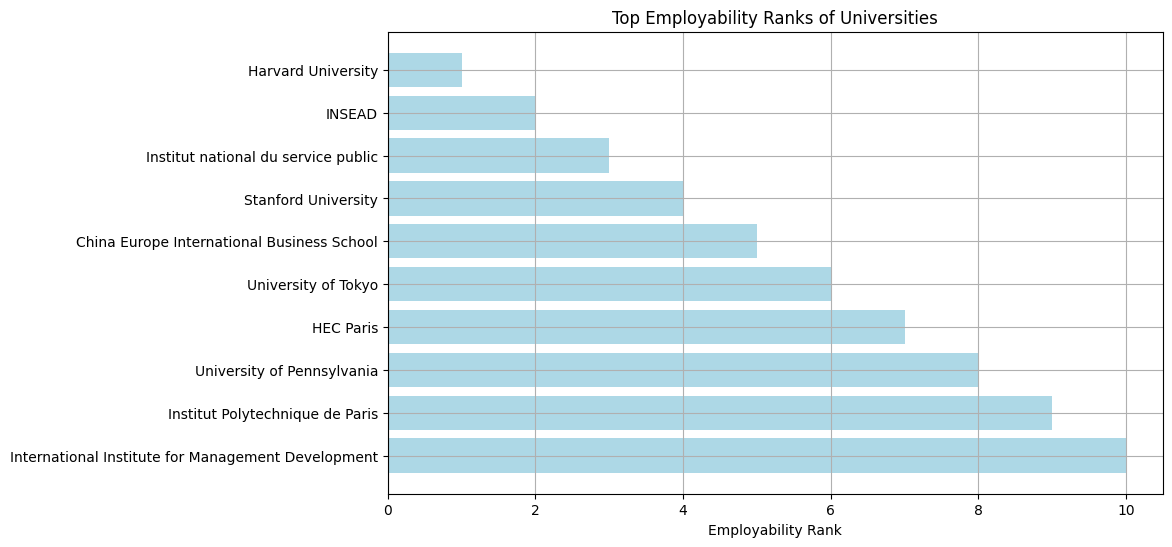

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(dff_sorted['University Names'], dff_sorted['Employability Rank'], color='lightblue')
plt.xlabel('Employability Rank')
plt.title('Top Employability Ranks of Universities by CWUR')
plt.gca().invert_yaxis() 
plt.grid(True)
plt.show()

### c. What positions do universities in Saudi Arabia hold within the global
 rankings?

In [ ]:
df.rename(columns={'Location ' : 'Location'}, inplace=True)
dfSA = df[df['Location'] == 'Saudi Arabia']
dfSA

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
244,245,King Abdulaziz University,Saudi Arabia,1,0,1330,0,186,77.8
278,279,King Abdullah University of Science and Techno...,Saudi Arabia,2,0,0,171,297,77.2
351,352,King Saud University,Saudi Arabia,3,0,344,0,332,76.1
656,657,King Fahd University of Petroleum and Minerals,Saudi Arabia,4,0,107,0,792,72.8
1310,1311,King Saud bin Abdulaziz University for Health ...,Saudi Arabia,5,0,0,0,1255,68.8
1446,1447,King Khalid University,Saudi Arabia,6,0,0,0,1385,68.1
1508,1509,Taif University,Saudi Arabia,7,0,0,0,1445,67.9
1546,1547,Imam Abdulrahman Bin Faisal University,Saudi Arabia,8,0,0,0,1484,67.7
1585,1586,Taibah University,Saudi Arabia,9,0,0,0,1520,67.5
1710,1711,Prince Sattam Bin Abdulaziz University,Saudi Arabia,10,0,0,0,1636,67.0


In [ ]:
#by using plotly library 
uni = dfSA['University Names']
rank = dfSA['World Rank']
fig = go.Figure(data=[
    go.Bar(name='Rank', x=uni, y=rank, marker_color='royalblue'
          )
])
fig.update_layout(
    title='Top Saudi Universities in the Global Rank by CWUR'
)
fig.show()

In [ ]:
dfS= df3[df3['Location'] == 'Saudi Arabia']
dfS


In [ ]:
uni_ = dfS['University Name']
rank_ = dfS['Rank']
fig = go.Figure(data=[
    go.Bar(name='Rank', x=uni_, y=rank_, marker_color='royalblue'
           #base='Rank' marker_color=[]
          )
])
fig.update_layout(
    title='Top Saudi Universities in the Global Rank by THE'
)
fig.show()

## d. Considering various factors such as employment rankings, research rankings, and others, which has the most significant impact on a university's overall ranking?

In [ ]:
# Calculate the correlation matrix and extract correlations with 'Score'
correlations = df[['Educational Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank', 'Score']].corr()['Score'][:-1]
correlations


Educational Rank      0.332856
Employability Rank    0.091413
Faculty Rank          0.367324
Research Rank        -0.827959
Name: Score, dtype: float64

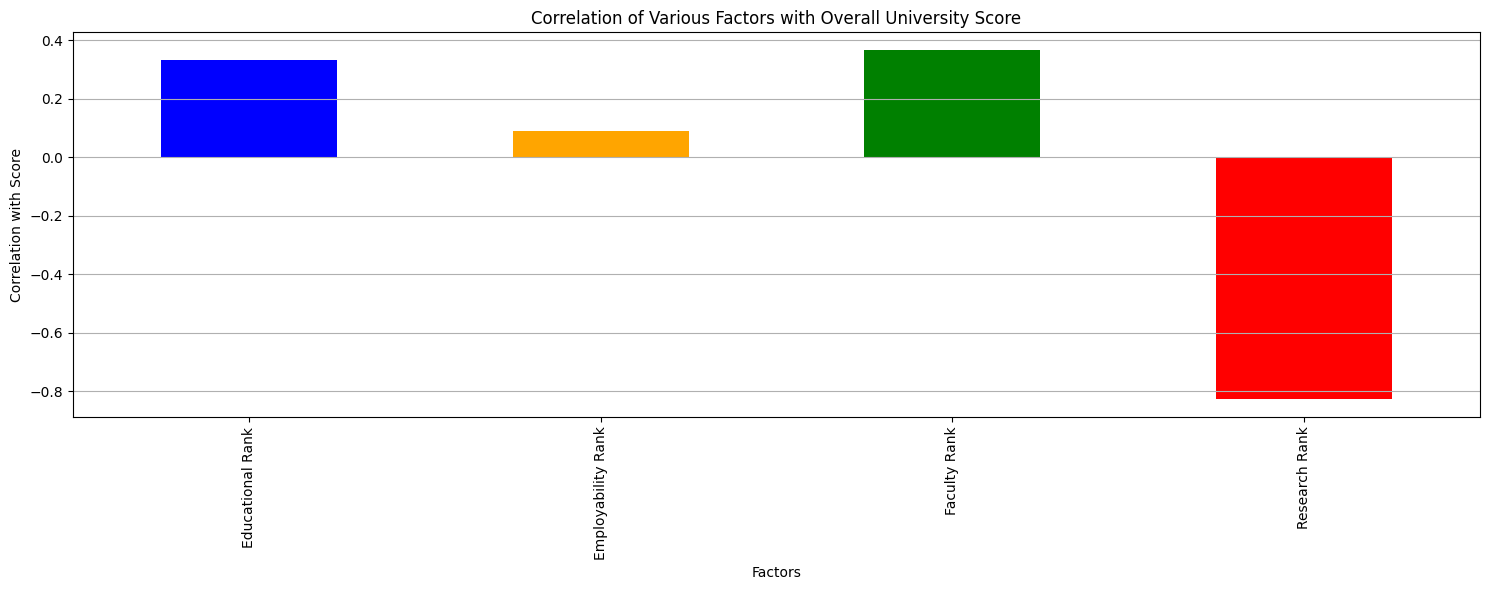

In [ ]:
# Create the bar chart
correlations.plot(kind='bar', color=['blue', 'orange', 'green', 'red'], figsize=(15, 6))
plt.xlabel('Factors')
plt.ylabel('Correlation with Score')
plt.title('Correlation of Various Factors with Overall University Score')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


# Bivariate/Multivariate Analysis:

# e. Is there a correlation between national and global university rankings?

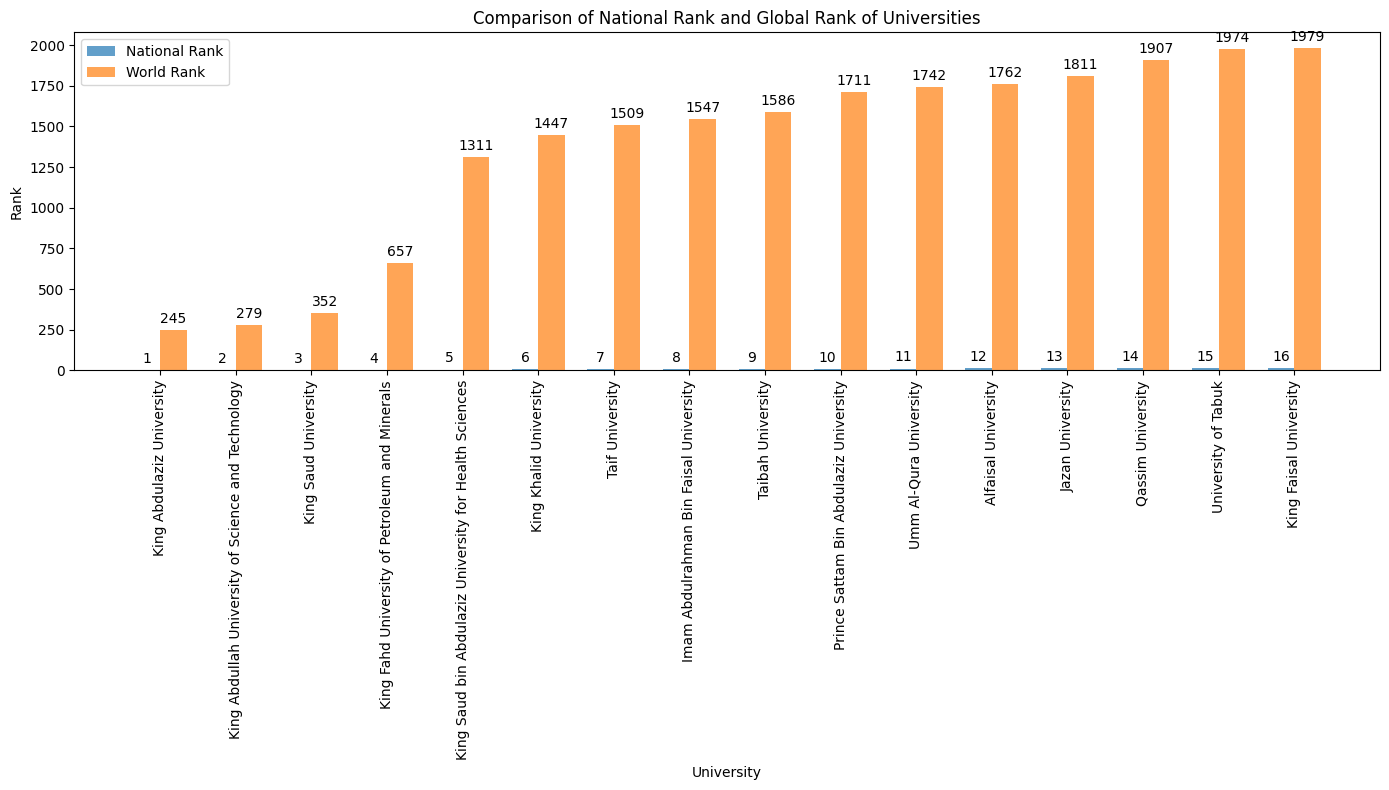

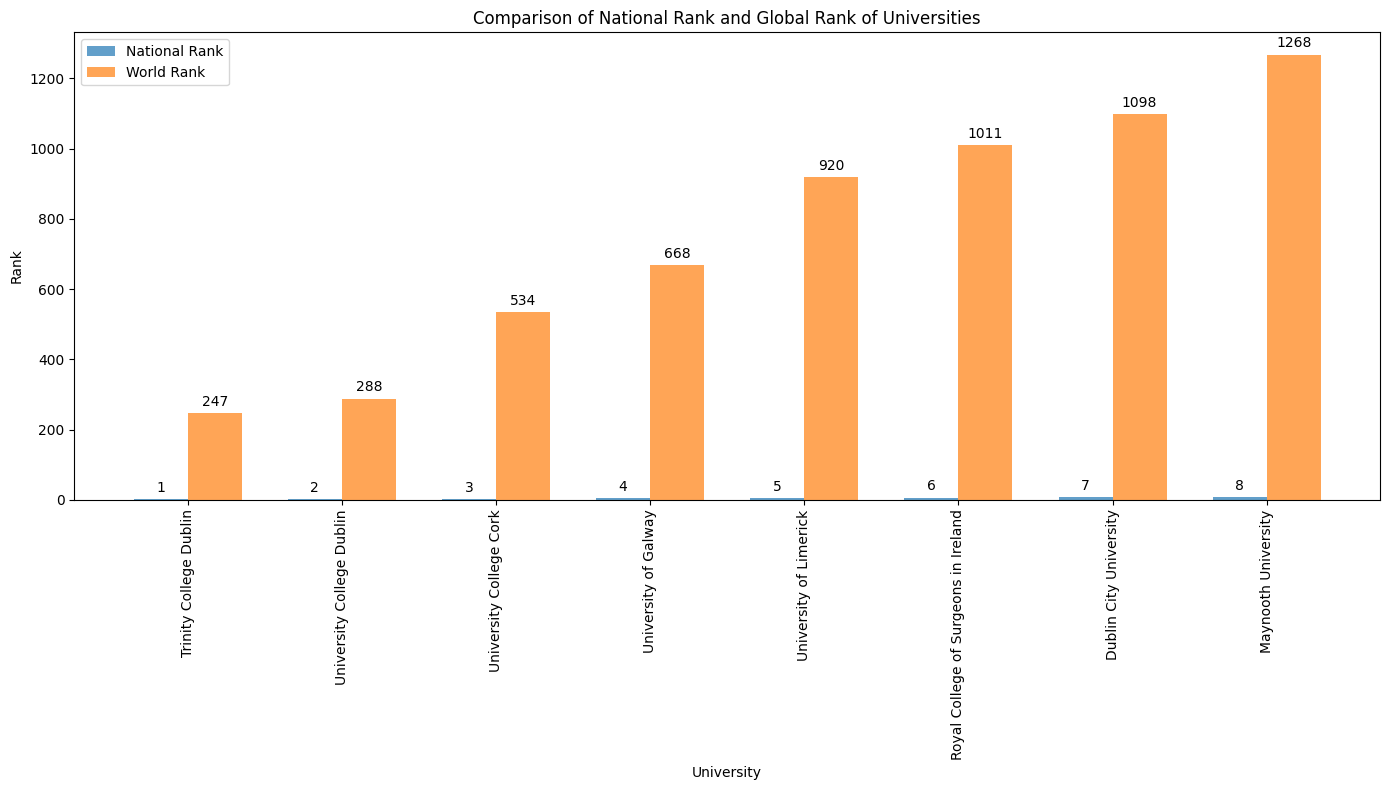

In [ ]:

# # Grouped bar chart for better visualization
df_saudi = df[df['Location'] == 'Saudi Arabia']
df_ireland = df[df['Location'] == 'Ireland']

def BarChart(df):
    fig, ax = plt.subplots(figsize=(14, 8))
    width = 0.35  # the width of the bars

    # Set the positions of the bars
    x = np.arange(len(df))

    # Bar plot for National Rank
    rects1 = ax.bar(x - width/2, df['National Rank'], width, label='National Rank', alpha=0.7)

    # Bar plot for World Rank
    rects2 = ax.bar(x + width/2, df['World Rank'], width, label='World Rank', alpha=0.7)

    ax.set_xlabel('University')
    ax.set_ylabel('Rank')
    ax.set_title('Comparison of National Rank and Global Rank of Universities')
    ax.set_xticks(x)
    ax.set_xticklabels(df['University Names'], rotation=90)
    ax.legend()

    # Add labels on top of the bars (optional)
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    plt.tight_layout()
    plt.show()


BarChart(df_saudi)
BarChart(df_ireland)


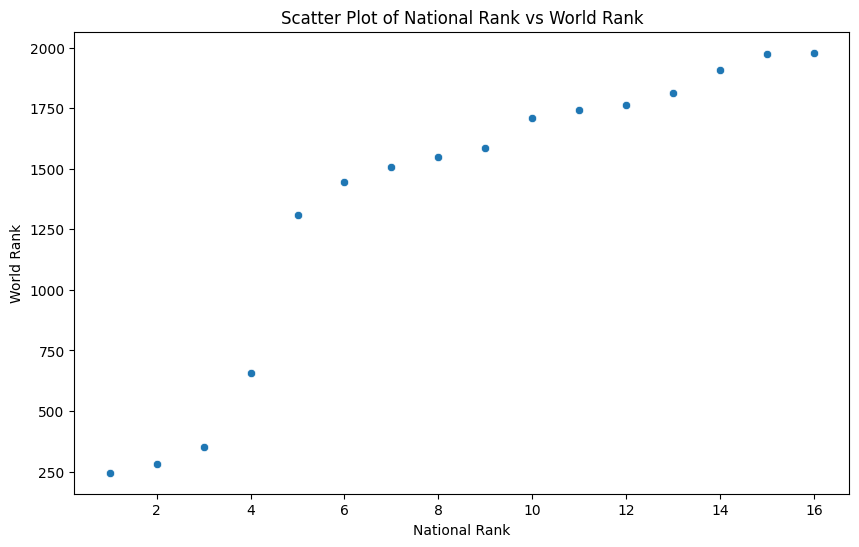

Correlation coefficient: 0.9151659280385351
P-value: 6.759759725800395e-07


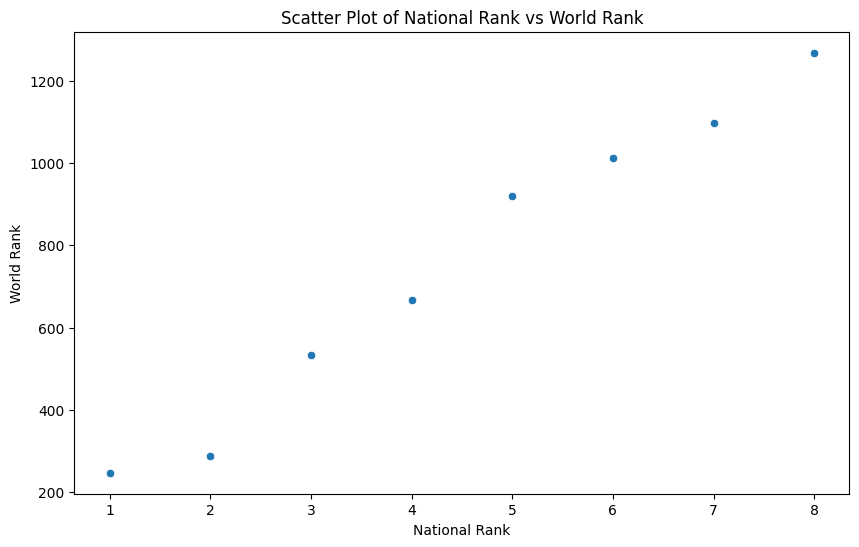

Correlation coefficient: 0.9906780808550334
P-value: 2.0110121616665987e-06


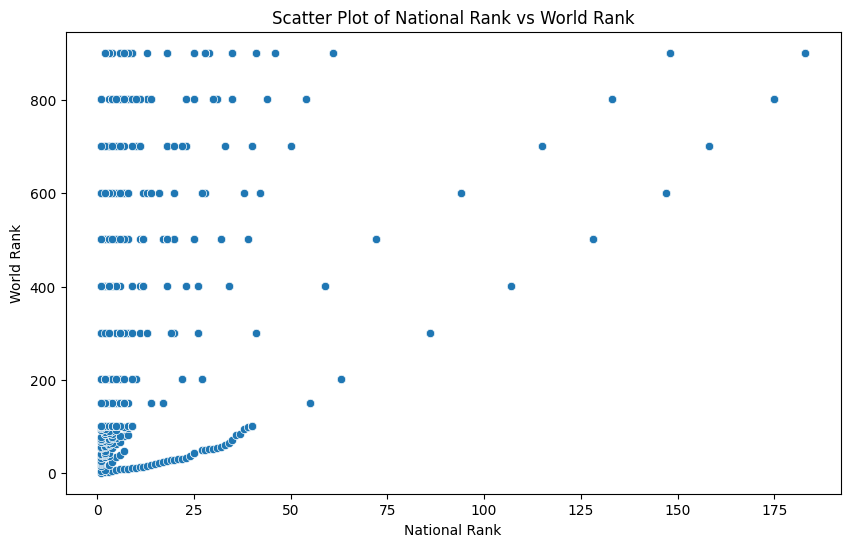

Correlation coefficient: 0.3444189171363755
P-value: 3.1431341070584e-29


In [ ]:
# Scatter plot
def Scatter(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['National Rank'], y=df['World Rank'])
    plt.xlabel('National Rank')
    plt.ylabel('World Rank')
    plt.title('Scatter Plot of National Rank vs World Rank')
    plt.show()

    # Calculate and display the correlation coefficient
    correlation, p_value = pearsonr(df['National Rank'], df['World Rank'])
    print(f"Correlation coefficient: {correlation}")
    print(f"P-value: {p_value}")

Scatter(df_saudi)
Scatter(df_ireland)




# we can see there is a liner coreleation between the world rank and the national rank,
# when ever the world rank go up the national rank go up with it,
# and we prove it is not a chance by using the Correlation coefficient and P-value which indicates how strong the correleation 


# can you recommend a country that appears to have a high concentration of top-ranked universities?

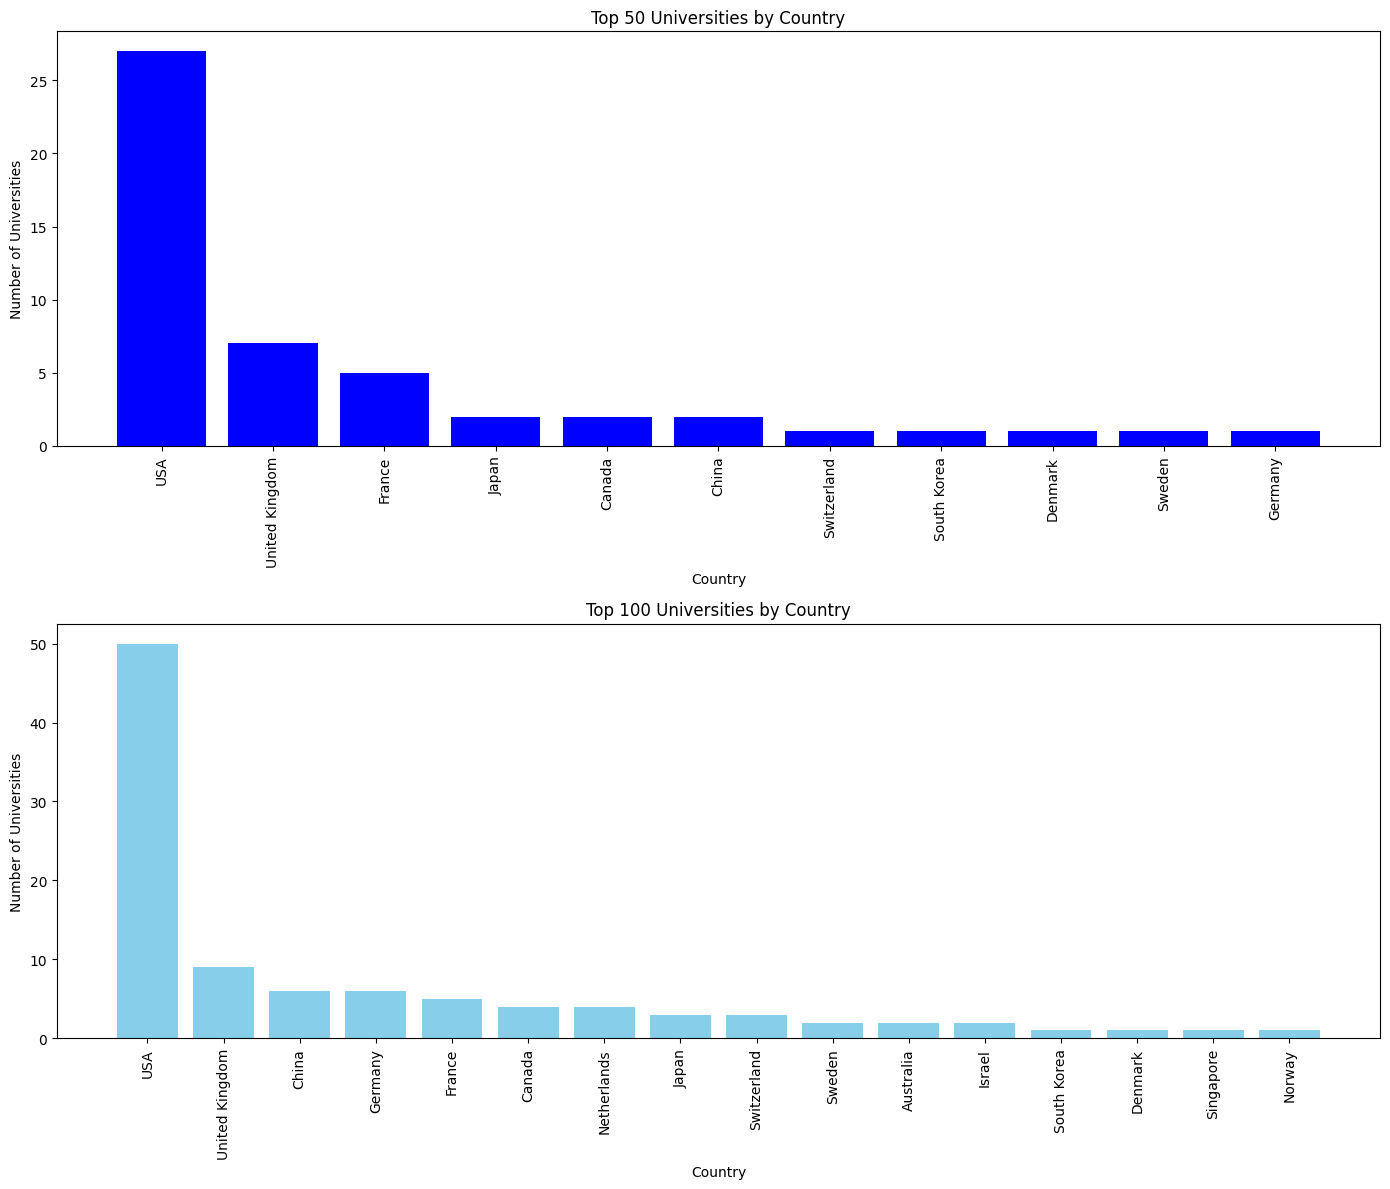

In [ ]:
# the USA seems to be the most country that has the best universtieas since it has 27 universty in the top 50
# and 50 universty in top 100
top_50_counts = df.head(50)['Location'].value_counts()
top_100_counts = df.head(100)['Location'].value_counts()

# Plotting the bar chart for the top 50 and top 100 universities
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Bar chart for top 50 universities
ax[0].bar(top_50_counts.index, top_50_counts.values, color='b')
ax[0].set_title('Top 50 Universities by Country')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Number of Universities')
ax[0].tick_params(axis='x', rotation=90)

# Bar chart for top 100 universities
ax[1].bar(top_100_counts.index, top_100_counts.values, color='skyblue')
ax[1].set_title('Top 100 Universities by Country')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Number of Universities')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3547e2b6-42c8-4135-808b-e3dfb4016068' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>